In [49]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
! pwd 

/Users/angelinechen/Documents/bilate_analysis


In [51]:
! ls -lh /Users/angelinechen/Desktop/GSE157453/GSM4766479_neg

total 20744
-rw-r--r--@ 1 angelinechen  staff   8.9K Oct 12 10:42 barcodes.tsv
-rw-r--r--@ 1 angelinechen  staff   1.3M Oct 12 10:54 genes.tsv
-rw-r--r--@ 1 angelinechen  staff   8.9M Oct 12 10:41 matrix.mtx


In [52]:
fn = '/Users/angelinechen/Desktop/GSE157453/ie_combined.csv'
ie_combined = pd.read_csv(fn, index_col = 0)

In [53]:
fn = '/Users/angelinechen/Desktop/GSE157453/innateness_beta_mod_2020-10-09_16-19-PM.tsv'
innate = pd.read_table(fn, index_col = 0)

In [55]:
fn = '/Users/angelinechen/Desktop/GSE157453/GSE157453_RNA.Meta.filtered.csv'
meta = pd.read_csv(fn)

In [56]:
ie_combined.shape

(1513, 3)

In [57]:
# gene expression matrix generated through Rstudio (Seurat)
fn = '/Users/angelinechen/Desktop/GSE157453/iel_neg_matrix.csv'
iel_neg = pd.read_csv(fn, index_col = 0)

In [58]:
fn = '/Users/angelinechen/Desktop/GSE157453/iel_pos_matrix.csv'
iel_pos = pd.read_csv(fn, index_col = 0)

In [59]:
iel_neg.head()

,AAACGGGCATCAGTCA,AAACGGGGTGTCCTCT,AAACGGGGTTCGTTGA,AAAGATGGTTCAACCA,AAATGCCAGCCACCTG,AAATGCCCATCGACGC,AACACGTCACTACAGT,AACCGCGTCAGCTCTC,AACGTTGTCGCGGATC,AACTCTTCAAACCCAT,...,TTCTACAGTCTACCTC,TTCTCAATCGAATGCT,TTCTTAGGTTACGCGC,TTGACTTAGTCTTGCA,TTGGCAAGTGCCTGGT,TTGGCAATCGACAGCC,TTGTAGGGTTGCTCCT,TTTCCTCAGTTCGATC,TTTGCGCCACGAAAGC,TTTGGTTCATCACAAC
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


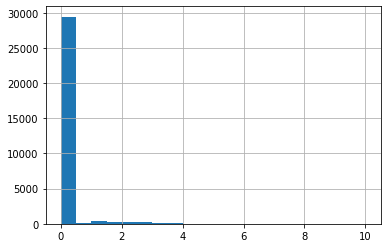

In [60]:
iel_neg['AAACGGGCATCAGTCA'].hist(bins = 20)

In [61]:
innate.head()

,GENE_NAME,GENE_TYPE,InnatenessLevel_(Beta),StdErr,Tvalue,Chisq,Pvalue,CalledSignificant,Chromosome.scaffold.name,MGI.symbol,Chromosome.scaffold.name.1,Gene.start..bp.,Gene.end..bp.
1,A1BG,protein_coding,-0.077074,0.019198,-4.014701,14.659422,0.000129,0,19,A1bg,15,60896859,60923012
2,A2M,protein_coding,0.304455,0.058876,5.171165,23.032006,0.000002,1,12,A2m,6,121635376,121679227
3,AAAS,protein_coding,-0.014435,0.021082,-0.684686,0.467387,0.494192,0,12,Aaas,15,102338252,102350771
4,AACS,protein_coding,-0.023681,0.011743,-2.016656,3.965678,0.046437,0,12,Aacs,5,125475814,125517410
5,AAGAB,protein_coding,0.074179,0.018596,3.988920,14.342422,0.000152,0,15,Aagab,9,63602660,63644588


In [62]:
vc = innate['MGI.symbol'].value_counts()


In [63]:
vc[vc > 1].shape

(259,)

In [64]:
innate.shape

(12592, 13)

In [65]:
innate_filt = innate[innate['MGI.symbol'].isin(vc[vc ==1].index.tolist())]

In [66]:
innate_filt.shape

(11827, 13)

In [67]:
tdf = innate_filt.set_index("MGI.symbol")[['InnatenessLevel_(Beta)']]

In [68]:
tdf.head()

,InnatenessLevel_(Beta)
MGI.symbol,
A1bg,-0.077074
A2m,0.304455
Aaas,-0.014435
Aacs,-0.023681
Aagab,0.074179


In [69]:
iel_neg_filt = iel_neg[iel_neg.index.isin(tdf.index.tolist())]

In [70]:
iel_pos_filt = iel_pos[iel_pos.index.isin(tdf.index.tolist())]

In [71]:
iel_neg_filt.shape

(11747, 478)

In [72]:
iel_neg_filt = iel_neg_filt.join(tdf, how = 'left')

In [73]:
iel_pos_filt = iel_pos_filt.join(tdf, how = 'left')

In [74]:
iel_neg_filt.head()

,AAACGGGCATCAGTCA,AAACGGGGTGTCCTCT,AAACGGGGTTCGTTGA,AAAGATGGTTCAACCA,AAATGCCAGCCACCTG,AAATGCCCATCGACGC,AACACGTCACTACAGT,AACCGCGTCAGCTCTC,AACGTTGTCGCGGATC,AACTCTTCAAACCCAT,...,TTCTCAATCGAATGCT,TTCTTAGGTTACGCGC,TTGACTTAGTCTTGCA,TTGGCAAGTGCCTGGT,TTGGCAATCGACAGCC,TTGTAGGGTTGCTCCT,TTTCCTCAGTTCGATC,TTTGCGCCACGAAAGC,TTTGGTTCATCACAAC,InnatenessLevel_(Beta)
Mrpl15,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,4.314455,0.000000,0.00000,...,0.0,0.000000,0.000000,1.698681,0.000000,2.292696,0.000000,2.541669,0.000000,-0.006432
Lypla1,1.855591,2.336121,1.885434,0.0,2.477719,0.0,0.0,3.013454,1.841361,0.00000,...,0.0,0.000000,0.000000,0.000000,2.177268,0.000000,0.000000,0.000000,0.000000,0.047906
Tcea1,1.329057,1.157495,1.350432,0.0,0.000000,0.0,0.0,2.158369,0.000000,0.00000,...,0.0,1.957821,0.849821,0.000000,1.559456,0.000000,2.235812,0.000000,1.243851,0.001308
Rgs20,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012159
Atp6v1h,2.390221,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.20537,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.236984,0.010727


In [27]:
test = iel_neg_filt["AACGTTGTCGCGGATC"] * iel_neg_filt["InnatenessLevel_(Beta)"]
    

In [28]:
test.head()

Mrpl15    -0.000000
Lypla1     0.088212
Tcea1      0.000000
Rgs20     -0.000000
Atp6v1h    0.000000
dtype: float64

In [29]:

test = pd.qcut(iel_neg_filt["AACGTTGTCGCGGATC"].astype(float),100,  duplicates = "drop")

In [30]:
test

Mrpl15     (-0.001, 0.963]
Lypla1      (1.678, 1.907]
Tcea1      (-0.001, 0.963]
Rgs20      (-0.001, 0.963]
Atp6v1h    (-0.001, 0.963]
                ...       
mt-Nd6     (-0.001, 0.963]
mt-Cytb     (1.143, 1.325]
Gm16367    (-0.001, 0.963]
Vamp7      (-0.001, 0.963]
Tmlhe      (-0.001, 0.963]
Name: AACGTTGTCGCGGATC, Length: 11747, dtype: category
Categories (12, interval[float64]): [(-0.001, 0.963] < (0.963, 1.143] < (1.143, 1.325] < (1.325, 1.484] ... (2.45, 2.792] < (2.792, 3.246] < (3.246, 4.116] < (4.116, 10.0]]

In [31]:
dfs = []
for c in iel_neg_filt.columns.tolist():
    if c != "InnatenessLevel_(Beta)":
        df = iel_neg_filt[c] * iel_neg_filt["InnatenessLevel_(Beta)"]
        df = df.to_frame(c)
        dfs.append(df)

iel_neg_filt_trans = pd.concat(dfs, axis = 1)

In [32]:
dfs = []
for c in iel_pos_filt.columns.tolist():
    if c != "InnatenessLevel_(Beta)":
        df = iel_pos_filt[c] * iel_neg_filt["InnatenessLevel_(Beta)"]
        df = df.to_frame(c)
        dfs.append(df)
        
iel_pos_filt_trans = pd.concat(dfs, axis = 1)

In [33]:
iel_pos_filt_trans.shape

(11747, 1035)

In [34]:
aggregate_score_iel_neg = iel_neg_filt_trans.sum(axis = 0)
aggregate_score_iel_neg = aggregate_score_iel_neg.to_frame("innateness_score")
aggregate_score_iel_neg['category'] = "iel_neg"
aggregate_score_iel_neg["barcode"] = "Neg_" + aggregate_score_iel_neg.index
aggregate_score_iel_neg = aggregate_score_iel_neg.reset_index(drop = True)

In [35]:
aggregate_score_iel_neg = aggregate_score_iel_neg.merge(meta[["Barcode","Res.1.0_Named"]].set_index("Barcode"),
                              left_on = "barcode", right_index = True, how = 'left')

In [36]:
aggregate_score_iel_pos = iel_pos_filt_trans.sum(axis = 0)
aggregate_score_iel_pos = aggregate_score_iel_pos.to_frame("innateness_score")
aggregate_score_iel_pos['category'] = "iel_pos"
aggregate_score_iel_pos["barcode"] = "Pos_" + aggregate_score_iel_pos.index
aggregate_score_iel_pos = aggregate_score_iel_pos.reset_index(drop = True)

In [37]:
aggregate_score_iel_pos = aggregate_score_iel_pos.merge(meta[["Barcode","Res.1.0_Named"]].set_index("Barcode"),
                              left_on = "barcode", right_index = True, how = 'left')

In [38]:
aggregate_scores_all = pd.concat([aggregate_score_iel_neg, aggregate_score_iel_pos], ignore_index = True)

In [39]:
aggregate_score_iel_pos.head()

,innateness_score,category,barcode,Res.1.0_Named
0,48.625035,iel_pos,Pos_AAACCTGTCGGCGCAT,0_Pre-IELS1
1,31.639730,iel_pos,Pos_AAACCTGTCGTTTGCC,4_Pre-IEL2
2,50.977748,iel_pos,Pos_AAACGGGAGAACAACT,0_Pre-IELS1
3,57.673448,iel_pos,Pos_AAACGGGAGGAGTAGA,1_Treg-like
4,48.029379,iel_pos,Pos_AAACGGGGTGTGACGA,Egr3_Cells


In [40]:
meta.Barcode.unique().shape

(1294,)

In [41]:
iel_neg_filt.shape

(11747, 479)

In [42]:
meta.shape

(1294, 13)

In [43]:
aggregate_score_iel_neg.head()

,innateness_score,category,barcode,Res.1.0_Named
0,30.324211,iel_neg,Neg_AAACGGGCATCAGTCA,NaN
1,48.362175,iel_neg,Neg_AAACGGGGTGTCCTCT,2_CD4-IELS
2,59.571096,iel_neg,Neg_AAACGGGGTTCGTTGA,2_CD4-IELS
3,46.108556,iel_neg,Neg_AAAGATGGTTCAACCA,2_CD4-IELS
4,68.134065,iel_neg,Neg_AAATGCCAGCCACCTG,2_CD4-IELS


In [44]:
aggregate_score_iel_neg["Res.1.0_Named"].isnull().value_counts()

False    396
True      82
Name: Res.1.0_Named, dtype: int64

In [45]:
for_plot = aggregate_score_iel_neg[aggregate_score_iel_neg["Res.1.0_Named"].notnull()]

In [46]:
for_plot_all = aggregate_scores_all[aggregate_scores_all["Res.1.0_Named"].notnull()]

In [47]:
fn_out = '/Users/angelinechen/Desktop/GSE157453/aggregate_innateness_prediction.tsv'
aggregate_scores_all.to_csv(fn_out, sep = '\t', index = False)

Text(0.5, 1.0, 'IEL Neg')

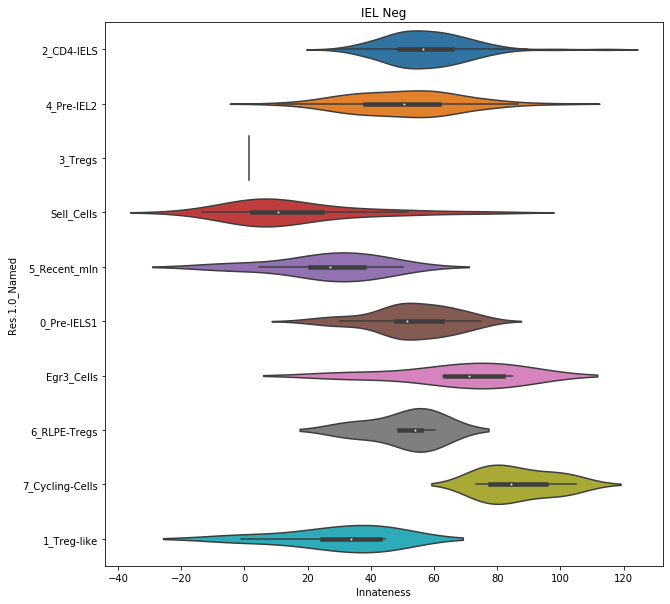

In [48]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax = sns.violinplot(y = "Res.1.0_Named", x = "innateness_score", data = for_plot, ax = ax)
ax.set_xlabel("Innateness")
ax.set_title("IEL Neg")




Text(0.5, 1.0, 'IEL Neg')

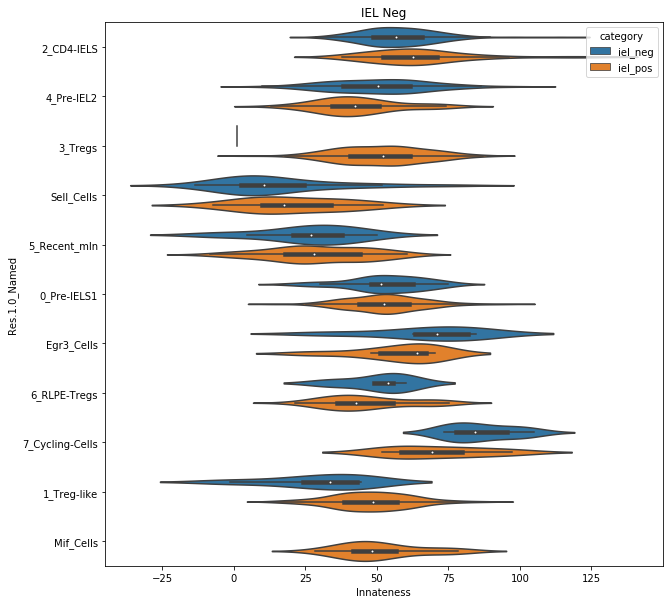

In [114]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax = sns.violinplot(y = "Res.1.0_Named", x = "innateness_score", hue = "category",
                    data = for_plot_all, ax = ax)
ax.set_xlabel("Innateness")
ax.set_title("IEL Neg")


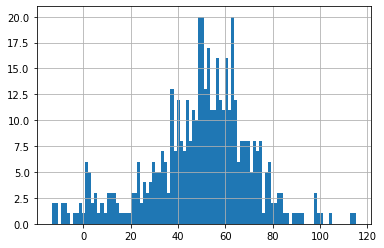

In [78]:
aggregate_score_iel_neg.hist(bins = 100)

In [73]:
 iel_neg_filt["AACGTTGTCGCGGATC"].head()

Mrpl15     0.000000
Lypla1     1.841361
Tcea1      0.000000
Rgs20      0.000000
Atp6v1h    0.000000
Name: AACGTTGTCGCGGATC, dtype: float64

In [75]:
iel_neg_filt_trans["AACGTTGTCGCGGATC"].head()

Mrpl15    -0.000000
Lypla1     0.088212
Tcea1      0.000000
Rgs20     -0.000000
Atp6v1h    0.000000
Name: AACGTTGTCGCGGATC, dtype: float64

In [36]:
innate[innate["MGI.symbol"] == "Zfp78"]

,GENE_NAME,GENE_TYPE,InnatenessLevel_(Beta),StdErr,Tvalue,Chisq,Pvalue,CalledSignificant,Chromosome.scaffold.name,MGI.symbol,Chromosome.scaffold.name.1,Gene.start..bp.,Gene.end..bp.
5320,KRBOX4,protein_coding,-0.040604,0.017789,-2.282505,5.039599,0.024774,0,X,Zfp78,7,6363280,6382605
7924,PRDM9,protein_coding,0.032233,0.026206,1.229965,1.498510,0.220901,0,5,Zfp78,7,6363280,6382605
12205,ZNF124,protein_coding,-0.030801,0.013316,-2.313149,5.177247,0.022885,0,1,Zfp78,7,6363280,6382605
12225,ZNF20,protein_coding,-0.066225,0.032236,-2.054375,4.111582,0.042591,0,19,Zfp78,7,6363280,6382605
12280,ZNF337,protein_coding,-0.037473,0.021910,-1.710308,2.870625,0.090210,0,20,Zfp78,7,6363280,6382605
12361,ZNF439,protein_coding,-0.063504,0.025337,-2.506333,6.044458,0.013950,0,19,Zfp78,7,6363280,6382605
12362,ZNF440,protein_coding,0.007731,0.014651,0.527694,0.277971,0.598034,0,19,Zfp78,7,6363280,6382605
12375,ZNF491,protein_coding,-0.030574,0.046404,-0.658870,0.432921,0.510559,0,19,Zfp78,7,6363280,6382605
12396,ZNF554,protein_coding,-0.002584,0.013772,-0.187662,0.035174,0.851231,0,19,Zfp78,7,6363280,6382605
12397,ZNF555,protein_coding,0.007938,0.027464,0.289027,0.083491,0.772621,0,19,Zfp78,7,6363280,6382605


In [33]:
innate['MGI.symbol'].value_counts().describe()

count    12086.000000
mean         1.038805
std          0.420886
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         18.000000
Name: MGI.symbol, dtype: float64

In [31]:

iel_neg.head()

,AAACGGGCATCAGTCA,AAACGGGGTGTCCTCT,AAACGGGGTTCGTTGA,AAAGATGGTTCAACCA,AAATGCCAGCCACCTG,AAATGCCCATCGACGC,AACACGTCACTACAGT,AACCGCGTCAGCTCTC,AACGTTGTCGCGGATC,AACTCTTCAAACCCAT,...,TTCTACAGTCTACCTC,TTCTCAATCGAATGCT,TTCTTAGGTTACGCGC,TTGACTTAGTCTTGCA,TTGGCAAGTGCCTGGT,TTGGCAATCGACAGCC,TTGTAGGGTTGCTCCT,TTTCCTCAGTTCGATC,TTTGCGCCACGAAAGC,TTTGGTTCATCACAAC
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
